<a href="https://colab.research.google.com/github/jokoeliyanto/BRI-Data-Hackathon-2021/blob/main/People_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1BMWWHtbQNlzYBdGeLtRHB1IaSArQA6sP
)

# People Analytics

Machine learning memungkinkan para pembuat keputusan di departemen HR untuk memprediksikan performance karyawan dalam 1 tahun kedepan menggunakan data histori KPI yang dimiliki perusahaan. Dalam kategori People Analytics, peserta diminta untuk membangun machine learning model yang dapat memprediksi performance karyawan dengan akurat.

##Task

Menggunakan data yang ada, peserta diminta untuk memprediksikan karyawan yang akan masuk kedalam golongan best performance dan yang tidak.

## Evaluation Metric
Metrik evaluasi yang akan digunakan adalah AUC AreaUnderROCCurveAreaUnderROCCurve, dimana nilai True Positive Rate akan dibandingkan dengan nilai False Positive Rate dalam threshold yang berbeda-beda.

\[ True Positive Rate = \frac{TP}{TP + FN} \]

\[ False Positive Rate = \frac{FP}{FP + TN} \]


## Submission

Submission dari task ini berisi 6000 baris dengan 2 kolom index dan Best Performance, dimana index akan disesuaikan dengan index data yang ada pada test.csv, dan Best Performance adalah nilai prediksi dalam float 0sampai10sampai1

Berikut adalah ilustrasi dari submission yang diminta (contoh submission dapat dilihat pada file sample_submission.csv)


In [ ]:
import pandas as pd
submission=pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/BRI-Data-Hackathon-2021/main/People%20Analysis/sample_submission.csv')
submission.head()

,index,Best Performance
0,0,0.131028
1,1,0.379354
2,2,0.031798
3,3,0.285220
4,4,0.848732


## EDA

In [ ]:
#Melihat deskripsi variabel data
description=pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/BRI-Data-Hackathon-2021/main/People%20Analysis/data_description.csv')
description

,Kolom,Keterangan
0,job_level,Level Jabatan Pekerja
1,job_duration_in_current_job_level,Masa Kerja pada job level saat ini
2,person_level,Level personal Pekerja
3,job_duration_in_current_person_level,Masa Kerja pada person level saat ini
4,job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini
5,Employee_type,"Tipe Pekerja ( 3 tipe Relationship Manager, ti..."
6,gender,Jenis Kelamin
7,age,Usia
8,marital_status_maried(Y/N),Status Pernikahan (Y / N)
9,number_of_dependences,Jumlah anak dalam tanggungan


In [ ]:
#Mengakses dataset
data_train=pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/BRI-Data-Hackathon-2021/main/People%20Analysis/train.csv')
data_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [ ]:
#Melihat jumlah kolom data baris dataset
data_train.shape

(11153, 22)

In [ ]:
#Melihat tpe data kolom
data_train.dtypes

job_level                                 object
job_duration_in_current_job_level        float64
person_level                              object
job_duration_in_current_person_level     float64
job_duration_in_current_branch           float64
Employee_type                             object
gender                                     int64
age                                        int64
marital_status_maried(Y/N)                object
number_of_dependences                      int64
Education_level                           object
GPA                                      float64
year_graduated                             int64
job_duration_from_training                 int64
branch_rotation                            int64
job_rotation                               int64
assign_of_otherposition                    int64
annual leave                               int64
sick_leaves                                int64
Last_achievement_%                       float64
Achievement_above_10

In [ ]:
data_train['job_level'].value_counts()

JG04    10413
JG05      704
JG03       36
Name: job_level, dtype: int64

In [ ]:
#Menghitung data kosong untuk setiap kolom
print(data_train.isna().sum())

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64


In [ ]:
#Menghapus data kosong untuk setiap kolom
data_train=data_train.dropna()
print(data_train.isna().sum())

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64


In [ ]:
#Menghitung data bernilai 0
data_train.isnull().values.any()

False

In [ ]:
#Melihat statistik dataset(Data Numerik)
data_train.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.00000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
mean,1.433221,1.349223,1.034658,1.735653,1985.836621,0.995606,3.176221,2009.17387,6.278067,3.720140,3.505560,1.202834,3.664455,1.098906,72.234902,0.679071,0.146790
std,0.431103,0.324674,0.416740,0.441005,4.632164,0.881092,13.322284,4.11726,5.033764,2.399174,1.818055,2.575228,2.652647,2.711453,23.030421,1.107381,0.353912
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.00000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.00000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.00000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.00000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.00000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


In [ ]:
#Menghitung jumlah karyawan 
data_train['Best Performance'].value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


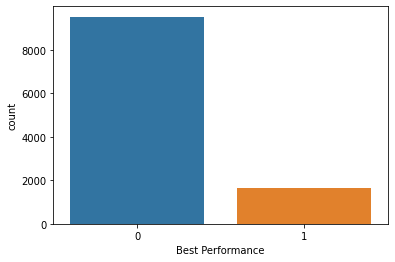

In [ ]:
#Memvisualisasikan jumlah karyawan didasarkan pada performanya
import seaborn as sns
sns.countplot(data_train['Best Performance'])

In [ ]:
#Persentase jumlah karyawan yang berperforma baik
1637/(9515+1637)*100

14.678981348637016

In [ ]:
#Mencetak semua tipe data dan unique valuenya
for column in data_train.columns:
  if data_train[column].dtype == object:
    print(str(column)+ ':' +str(data_train[column].unique()))
    print(data_train[column].value_counts())
    print('-------------------------------------------------------------------------------|')

job_level:['JG04' 'JG05' 'JG03']
JG04    10412
JG05      704
JG03       36
Name: job_level, dtype: int64
-------------------------------------------------------------------------------|
person_level:['PG03' 'PG06' 'PG05' 'PG04' 'PG07' 'PG02' 'PG01' 'PG08']
PG03    9654
PG04     757
PG06     378
PG05     308
PG01      19
PG07      19
PG02      16
PG08       1
Name: person_level, dtype: int64
-------------------------------------------------------------------------------|
Employee_type:['RM_type_A' 'RM_type_C' 'RM_type_B']
RM_type_A    7286
RM_type_B    3380
RM_type_C     486
Name: Employee_type, dtype: int64
-------------------------------------------------------------------------------|
marital_status_maried(Y/N):['Y' 'N']
Y    9501
N    1651
Name: marital_status_maried(Y/N), dtype: int64
-------------------------------------------------------------------------------|
Education_level:['level_0' 'level_1' 'level_2' 'level_3' 'level_4' 'level_5']
level_4    9222
level_3    1742
level_1  

In [ ]:
# Melakukan kodifikasi 
kodifikasi = {"job_level":{"JG05": 1, "JG04": 2, "JG03": 3},
              "person_level": {"PG01": 1,"PG02": 2,"PG03": 3,"PG04": 4,"PG05": 5,"PG06": 6,"PG07": 7,"PG08": 8 },
              "Employee_type":{"RM_type_A": 1, "RM_type_B": 2, "RM_type_C": 3},
              "marital_status_maried(Y/N)":{"Y":1, "N":0},
              "Education_level":{"level_0": 0, "level_1": 1, "level_2": 2, "level_3": 3, "level_4": 4, "level_5": 5}
              }
df =data_train.replace(kodifikasi)
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,2,1.352775,3,1.352775,1.732051,1,2,1985,1,1,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,2,1.292285,3,1.292285,1.039230,1,2,1989,1,0,1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,1,2.565151,6,2.308679,1.780449,3,1,1970,1,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,1,2.828427,6,1.000000,1.385641,1,2,1967,1,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,1,2.828427,6,2.828427,0.707107,1,2,1965,1,3,1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0


In [ ]:
df.dtypes

job_level                                  int64
job_duration_in_current_job_level        float64
person_level                               int64
job_duration_in_current_person_level     float64
job_duration_in_current_branch           float64
Employee_type                              int64
gender                                     int64
age                                        int64
marital_status_maried(Y/N)                 int64
number_of_dependences                      int64
Education_level                            int64
GPA                                      float64
year_graduated                             int64
job_duration_from_training                 int64
branch_rotation                            int64
job_rotation                               int64
assign_of_otherposition                    int64
annual leave                               int64
sick_leaves                                int64
Last_achievement_%                       float64
Achievement_above_10

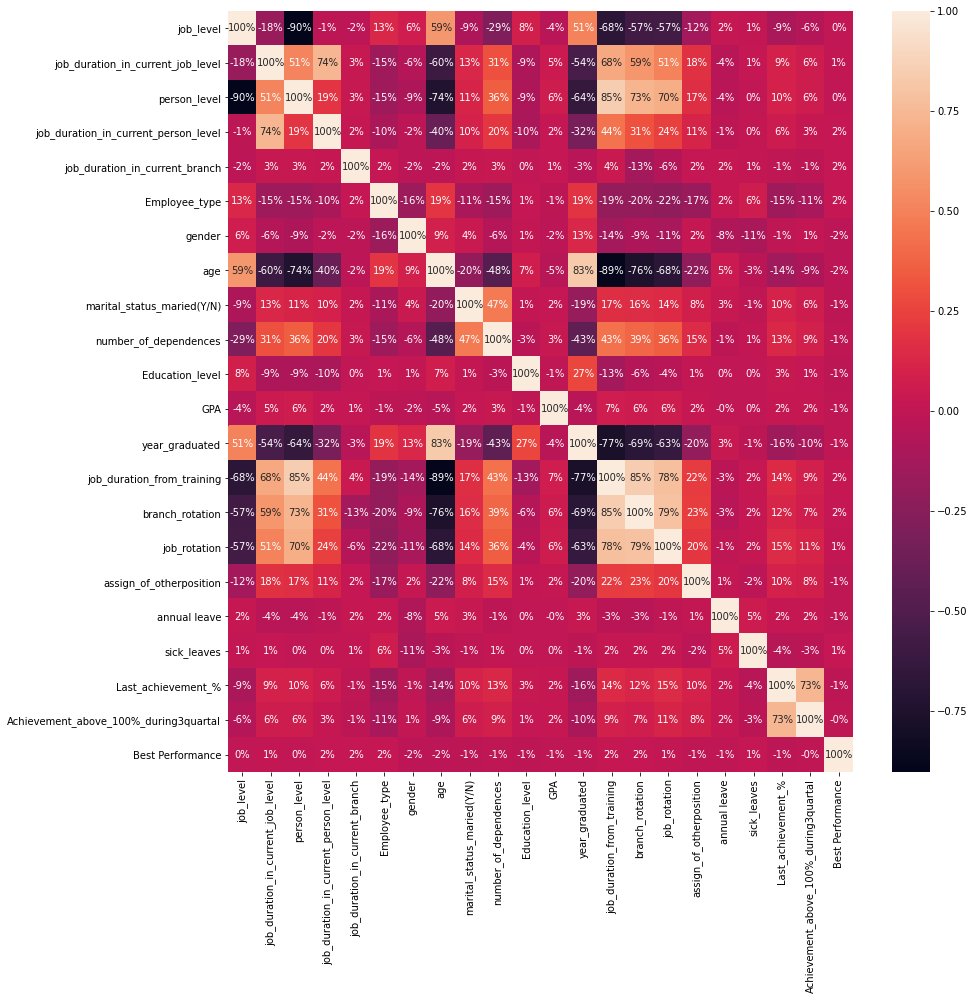

In [ ]:
#Visualisasi Korelasi
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt= '.0%')

In [ ]:
#Scatter Plot antar Variable berdasarkan kategori Best Performance
import plotly.express as px
kolom=list(df.columns)
features = kolom[:4]
fig = px.scatter_matrix(df, dimensions=features, color="Best Performance")
fig.show()

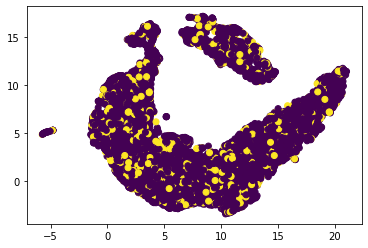

In [ ]:
#Scatter Plot dengan UMAP
import umap
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=99).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=Y)
plt.show()

## Classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Membagi X dan Y menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

### Model KNN

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print('akurasi model KNN:', accuracy_score(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

akurasi model KNN: 0.8431196772747647
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2169
           1       0.03      0.13      0.04        62

    accuracy                           0.84      2231
   macro avg       0.50      0.50      0.48      2231
weighted avg       0.95      0.84      0.89      2231



Model SVC

In [ ]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print('akurasi model SVC:',accuracy_score(SVC_prediction, y_test))
print(classification_report(SVC_prediction, y_test))

akurasi model SVC: 0.8637382339757956
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      2231
           1       0.00      0.00      0.00         0

    accuracy                           0.86      2231
   macro avg       0.50      0.43      0.46      2231
weighted avg       1.00      0.86      0.93      2231



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### Model Regresi Logistik

In [ ]:
reg_log_model= LogisticRegression(solver='liblinear', random_state=0)
reg_log_model.fit(X_train, y_train)
reg_log__prediction=reg_log_model.predict(X_test)
print('akurasi model Regresi Logistik:',accuracy_score(reg_log__prediction, y_test))
print(classification_report(reg_log__prediction, y_test))

akurasi model Regresi Logistik: 0.8637382339757956
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      2231
           1       0.00      0.00      0.00         0

    accuracy                           0.86      2231
   macro avg       0.50      0.43      0.46      2231
weighted avg       1.00      0.86      0.93      2231



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### Model LDA

In [ ]:
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction=LDA_model.predict(X_test)
print('akurasi model LDA:',accuracy_score(LDA_prediction, y_test))
print(classification_report(LDA_prediction, y_test))

akurasi model LDA: 0.8637382339757956
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      2231
           1       0.00      0.00      0.00         0

    accuracy                           0.86      2231
   macro avg       0.50      0.43      0.46      2231
weighted avg       1.00      0.86      0.93      2231



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### Model Naive Bayes

In [ ]:
NB_model= GaussianNB()
NB_model.fit(X_train, y_train)
NB_prediction=NB_model.predict(X_test)
print('akurasi model NB:',accuracy_score(NB_prediction, y_test))
print(classification_report(NB_prediction, y_test))

akurasi model NB: 0.7991931869116988
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2021
           1       0.11      0.16      0.13       210

    accuracy                           0.80      2231
   macro avg       0.51      0.51      0.51      2231
weighted avg       0.83      0.80      0.82      2231



### Model Decission Tree

In [ ]:
DT_model= DecisionTreeClassifier(random_state=0)
DT_model.fit(X_train, y_train)
DT_prediction=DT_model.predict(X_test)
print('akurasi model DT:',accuracy_score(DT_prediction, y_test))
print(classification_report(DT_prediction, y_test))

akurasi model DT: 0.7458538771851188
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1830
           1       0.23      0.17      0.20       401

    accuracy                           0.75      2231
   macro avg       0.53      0.52      0.52      2231
weighted avg       0.72      0.75      0.73      2231



## Regression

### Multiple Linear Regression

In [ ]:
#Multiple Linear Regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print(regr.coef_)

[ 0.02428208 -0.02845181 -0.014444    0.01763674  0.01833348  0.00803985
 -0.01169534 -0.00341209 -0.00694495 -0.00742217 -0.01208151 -0.00024351
  0.00295245  0.00337644  0.00459175 -0.00151579 -0.00115828 -0.00152016
  0.00094617 -0.00027042  0.00375985]


In [ ]:
#Prediksi Multiple Linear Regression
prediction = regr.predict(X)
print(prediction)
print(Y)
SSE=abs(prediction-Y).sum()
print('SSE', SSE)
print('Akurasi Model:', 1-SSE/len(data_train))

[0.20237844 0.17578944 0.22866596 ... 0.13152064 0.13085334 0.14603551]
[0 0 0 ... 0 0 0]
SSE 2783.0121833726075
Akurasi Model: 0.7504472575885395


Regression using Neural Networks

Epoch 1/10
349/349 [==============================] - 1s 1ms/step - loss: 70169.7344
Epoch 2/10
349/349 [==============================] - 0s 1ms/step - loss: 1.4398
Epoch 3/10
349/349 [==============================] - 0s 1ms/step - loss: 0.5991
Epoch 4/10
349/349 [==============================] - 0s 1ms/step - loss: 0.3106
Epoch 5/10
349/349 [==============================] - 0s 1ms/step - loss: 0.1995
Epoch 6/10
349/349 [==============================] - 0s 1ms/step - loss: 0.1529
Epoch 7/10
349/349 [==============================] - 0s 1ms/step - loss: 0.1372
Epoch 8/10
349/349 [==============================] - 0s 1ms/step - loss: 0.1288
Epoch 9/10
349/349 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 10/10
349/349 [==============================] - 0s 1ms/step - loss: 0.1444


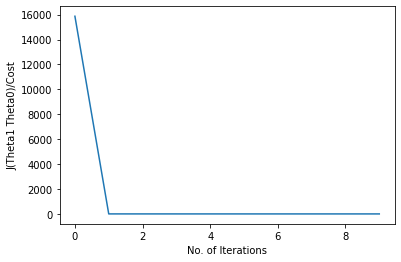

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Training 
train_x = X
train_y = Y

# Keras model
model = Sequential()
model.add(Dense(1, input_dim=21))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

# Gradient descent algorithm
adam = Adam(0.1)

model.compile(loss='mse', optimizer=adam)
history = model.fit(train_x, train_y, epochs=10)

plt.plot(history.history['loss'])
plt.xlabel("No. of Iterations")
plt.ylabel("J(Theta1 Theta0)/Cost")
plt.show()


In [ ]:
prediction=model.predict(X).flatten()
print(prediction)
print(Y)
SSE=abs(prediction-Y).sum()
print('SSE', SSE)
print('Akurasi Model:', 1-SSE/len(data_train))

[ 0.04306173  0.03921771  0.02247965 ...  0.01238847 -0.00261855
  0.0007906 ]
[0 0 0 ... 0 0 0]
SSE 1824.5667853355408
Akurasi Model: 0.8363910701815332
